In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as md
import matplotlib.ticker as ticker
from scipy import stats
import numpy as np

In [4]:
Dots = pd.read_csv('Data_Level4_UMDOTS_CampusTrafficCount.csv')

In [5]:
Dots

time  pedestrians  bicyclists  cars  buses  \
0      2019-10-28T00:00:00-04:00            0           0     0      0   
1      2019-10-28T00:15:00-04:00            0           0     0      0   
2      2019-10-28T00:30:00-04:00            0           0     0      0   
3      2019-10-28T00:45:00-04:00            0           0     0      0   
4      2019-10-28T01:00:00-04:00            0           0     0      0   
5      2019-10-28T01:15:00-04:00            0           0     0      0   
6      2019-10-28T01:30:00-04:00            0           0     1      0   
7      2019-10-28T01:45:00-04:00            0           0     0      0   
8      2019-10-28T02:00:00-04:00            0           0     1      0   
9      2019-10-28T02:15:00-04:00            0           0     0      0   
10     2019-10-28T02:30:00-04:00            0           0     0      0   
11     2019-10-28T02:45:00-04:00            0           0     1      0   
12     2019-10-28T03:00:00-04:00            0           0     0      0   
13     2019-10-28T03:15:00-04:00            0           0     0      0   
14     2019-10-28T03:30:00-04:00            0           0     0      0   
15     2019-10-28T03:45:00-04:00            0           0     0      0   
16     2019-10-28T04:00:00-04:00            0           0     0      0   
17     2019-10-28T04:15:00-04:00            0           0     0      0   
18     2019-10-28T04:30:00-04:00            0           0     0      0   
19     2019-10-28T04:45:00-04:00            0           0     0      0   
20     2019-10-28T05:00:00-04:00            0           0     0      0   
21     2019-10-28T05:15:00-04:00            0           0     1      0   
22     2019-10-28T05:30:00-04:00            2           3     1      0   
23     2019-10-28T05:45:00-04:00            0           0     0      0   
24     2019-10-28T06:00:00-04:00            0           0     4      0   
25     2019-10-28T06:15:00-04:00            0           0     0      0   
26     2019-10-28T06:30:00-04:00            0           0     2      0   
27     2019-10-28T06:45:00-04:00            2           0     2      0   
28     2019-10-28T07:00:00-04:00            1           1    15      1   
29     2019-10-28T07:15:00-04:00            1           0    75      4   
...                          ...          ...         ...   ...    ...   
13450  2019-11-10T17:30:00-04:00            2           0    78      0   
13451  2019-11-10T17:45:00-04:00           10           0   113      1   
13452  2019-11-10T18:00:00-04:00            8           0   231      0   
13453  2019-11-10T18:15:00-04:00            0           0   149      0   
13454  2019-11-10T18:30:00-04:00            0           0    86      0   
13455  2019-11-10T18:45:00-04:00            1           2    28      0   
13456  2019-11-10T19:00:00-04:00            0           1    23      0   
13457  2019-11-10T19:15:00-04:00            0           0    45      0   
13458  2019-11-10T19:30:00-04:00            0           0    16      0   
13459  2019-11-10T19:45:00-04:00            0           2     8      0   
13460  2019-11-10T20:00:00-04:00            0           0    12      0   
13461  2019-11-10T20:15:00-04:00            0           1    20      0   
13462  2019-11-10T20:30:00-04:00            0           1    12      0   
13463  2019-11-10T20:45:00-04:00            0           3    12      0   
13464  2019-11-10T21:00:00-04:00            0           0    17      0   
13465  2019-11-10T21:15:00-04:00            0           1    13      0   
13466  2019-11-10T21:30:00-04:00            0           1    19      0   
13467  2019-11-10T21:45:00-04:00            0           1     3      0   
13468  2019-11-10T22:00:00-04:00            0           1     5      0   
13469  2019-11-10T22:15:00-04:00            0           1     0      0   
13470  2019-11-10T22:30:00-04:00            0           0     8      0   
13471  2019-11-10T22:45:00-04:00            0           0     8      0   
13472  2019-11-10T23:00:00-04:00

![title](dots_sensor.jpg)

![title](map.jpg)

In [6]:
Dots['Date'] = Dots['time'].str[:10]
Dots['Date'] = pd.to_datetime(Dots['Date'])

In [7]:
Dots['StartTime'] = Dots['time'].str[11:19]
Dots['StartTime'] = pd.to_datetime(Dots['StartTime'])
Dots['StartTime'] = Dots['StartTime'].apply(lambda x: x.time())

In [8]:
Dots['time'] = pd.to_datetime(Dots['time'].str[:10]+' '+Dots['time'].str[11:19])

In [9]:
Dots['location'].value_counts()

Regents_Dr_&_Stadium_Dr_3            1348
Stadium_Dr_East_Of_Regents_Dr        1348
South_Gate_Northern_View             1348
Regents_Dr_&_Stadium_Dr_2            1348
Paint_Branch_Dr_At_Campus_Dr         1348
South_Gate_South_View                1348
University_Blvd_&_Paint_Branch_Dr    1348
Campus_Dr_At_Paint_Branch_Dr         1348
Campus_Dr_&_Presidential_Ave         1348
Regents_Dr_&_Stadium_Dr_1            1348
Name: location, dtype: int64

In [10]:
def loca_into_five(a):
    if 'Gate' in a:
        return "Baltimore Avenue & Regents Drive (South Gate)"
    elif ('Campus' in a) & ('Paint' in a):
        return "Campus Drive & Paint Branch Drive"
    elif ('Regents' in a) & ('Stadium' in a):
        return "Stadium Drive & Regents Drive"
    else:
        return a

In [11]:
Dots['location_5'] = Dots['location'].apply(loca_into_five)

In [12]:
Dots['weekday'] = Dots['Date'].apply(lambda x: x.weekday()+1)

In [13]:
Dots.sample(5)

time  pedestrians  bicyclists  cars  buses  trucks  \
8057  2019-11-10 17:15:00           25           6   246      0       1   
7222  2019-11-02 00:30:00            7           0    13      0       0   
8091  2019-10-28 00:45:00           21           0    43      6       2   
1777  2019-11-01 11:15:00           22           5   195     13      14   
10695 2019-11-10 02:45:00            0           0     0      0       0   

                           location       Date StartTime  \
8057      Regents_Dr_&_Stadium_Dr_3 2019-11-10  17:15:00   
7222      Regents_Dr_&_Stadium_Dr_3 2019-11-02  00:30:00   
8091       South_Gate_Northern_View 2019-10-28  00:45:00   
1777   Campus_Dr_At_Paint_Branch_Dr 2019-11-01  11:15:00   
10695         South_Gate_South_View 2019-11-10  02:45:00   

                                          location_5  weekday  
8057                   Stadium Drive & Regents Drive        7  
7222                   Stadium Drive & Regents Drive        6  
8091   Baltimore Avenue & Regents Drive (South Gate)        1  
1777               Campus Drive & Paint Branch Drive        5  
10695  Baltimore Avenue & Regents Drive (South Gate)        7

In [14]:
Dots['location_5'].value_counts()

Stadium Drive & Regents Drive                    5392
Baltimore Avenue & Regents Drive (South Gate)    2696
Campus Drive & Paint Branch Drive                2696
University_Blvd_&_Paint_Branch_Dr                1348
Campus_Dr_&_Presidential_Ave                     1348
Name: location_5, dtype: int64

In [15]:
import os
if not os.path.exists("figs"):
    os.makedirs("figs")

<Figure size 576x2160 with 0 Axes>

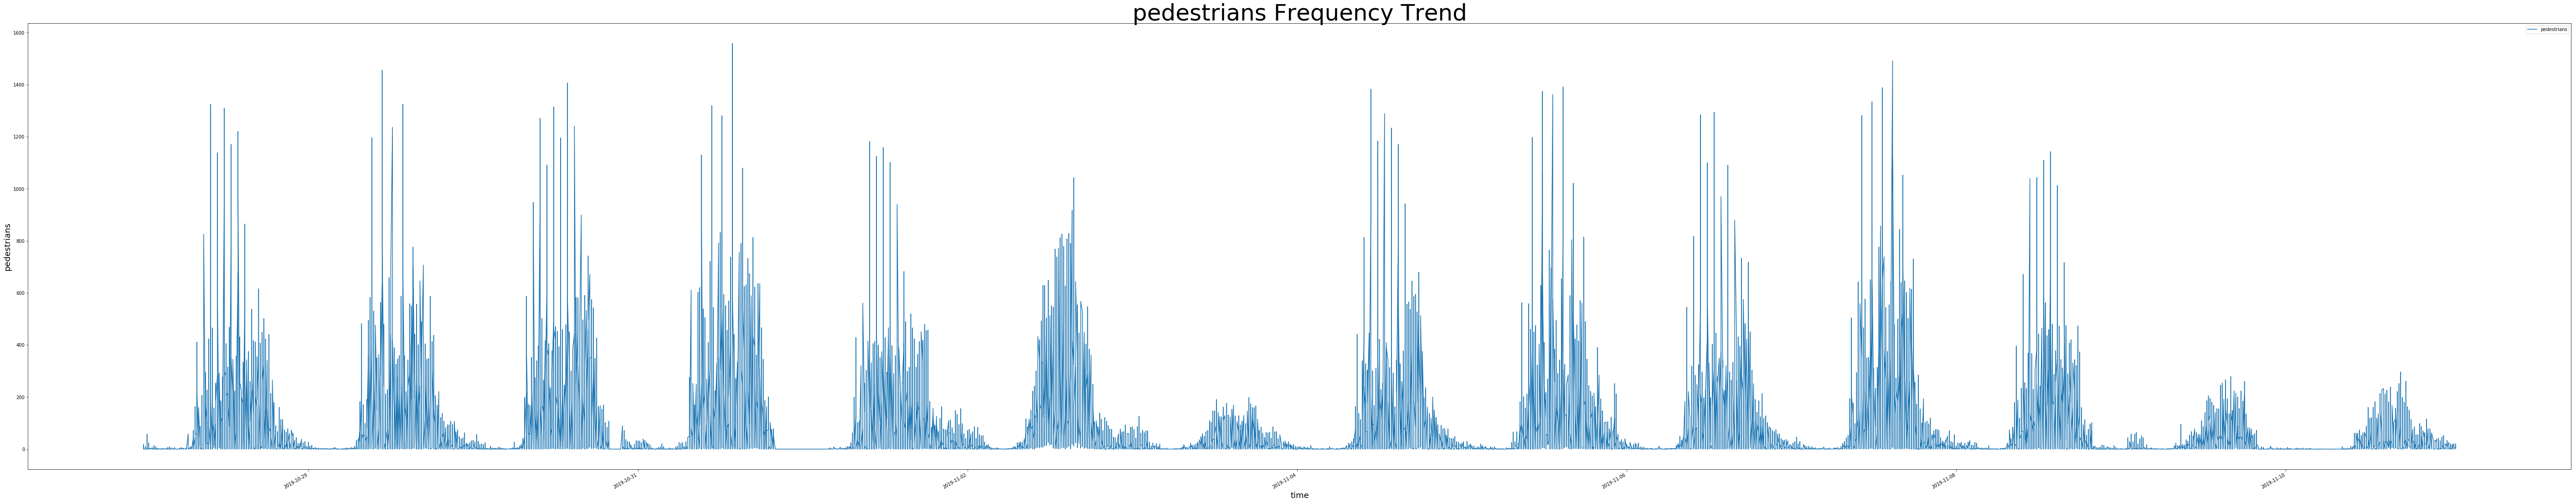

<Figure size 432x288 with 0 Axes>

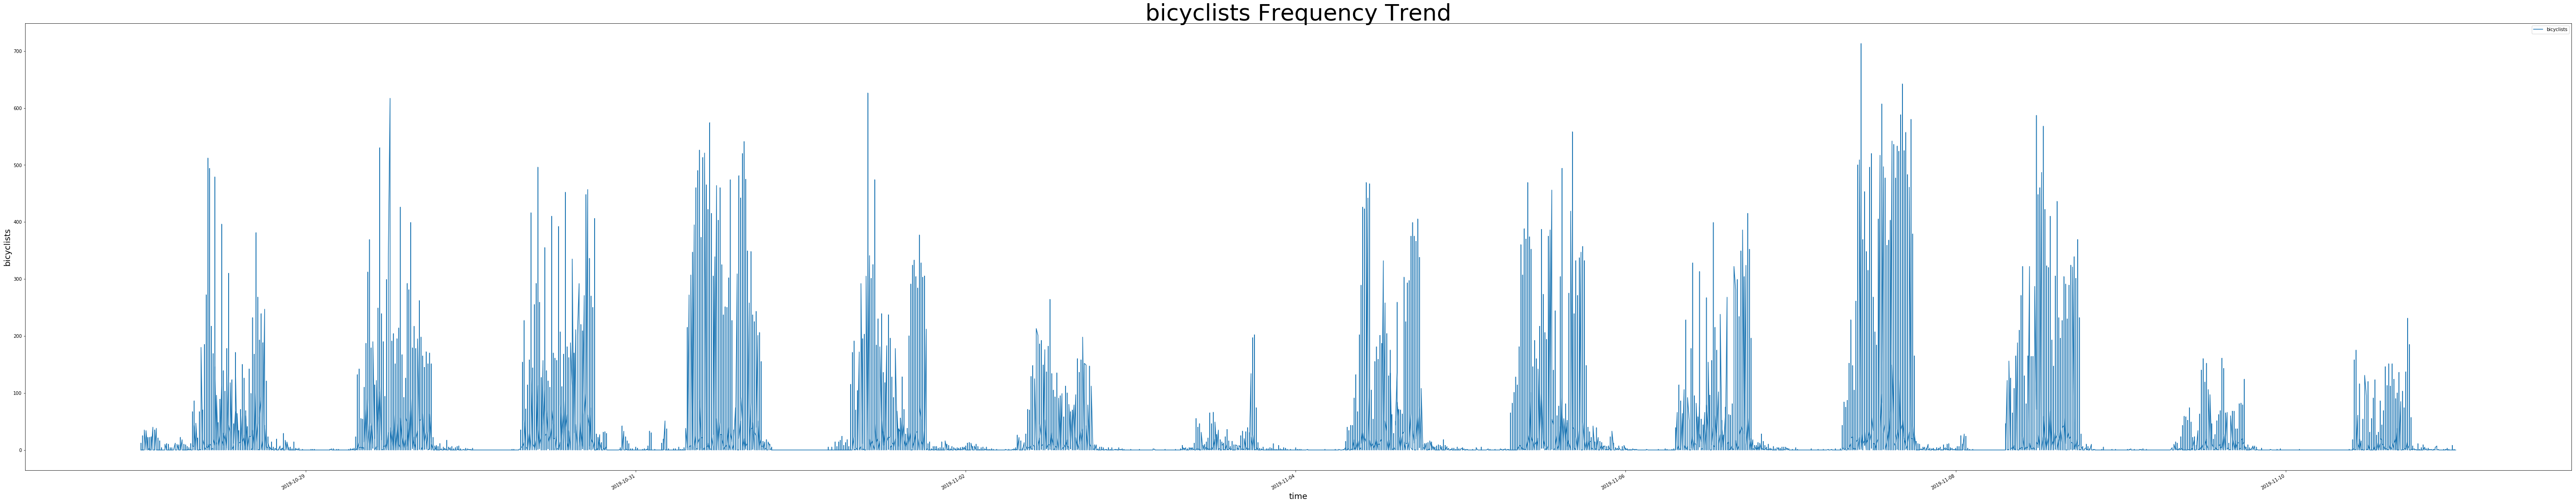

<Figure size 432x288 with 0 Axes>

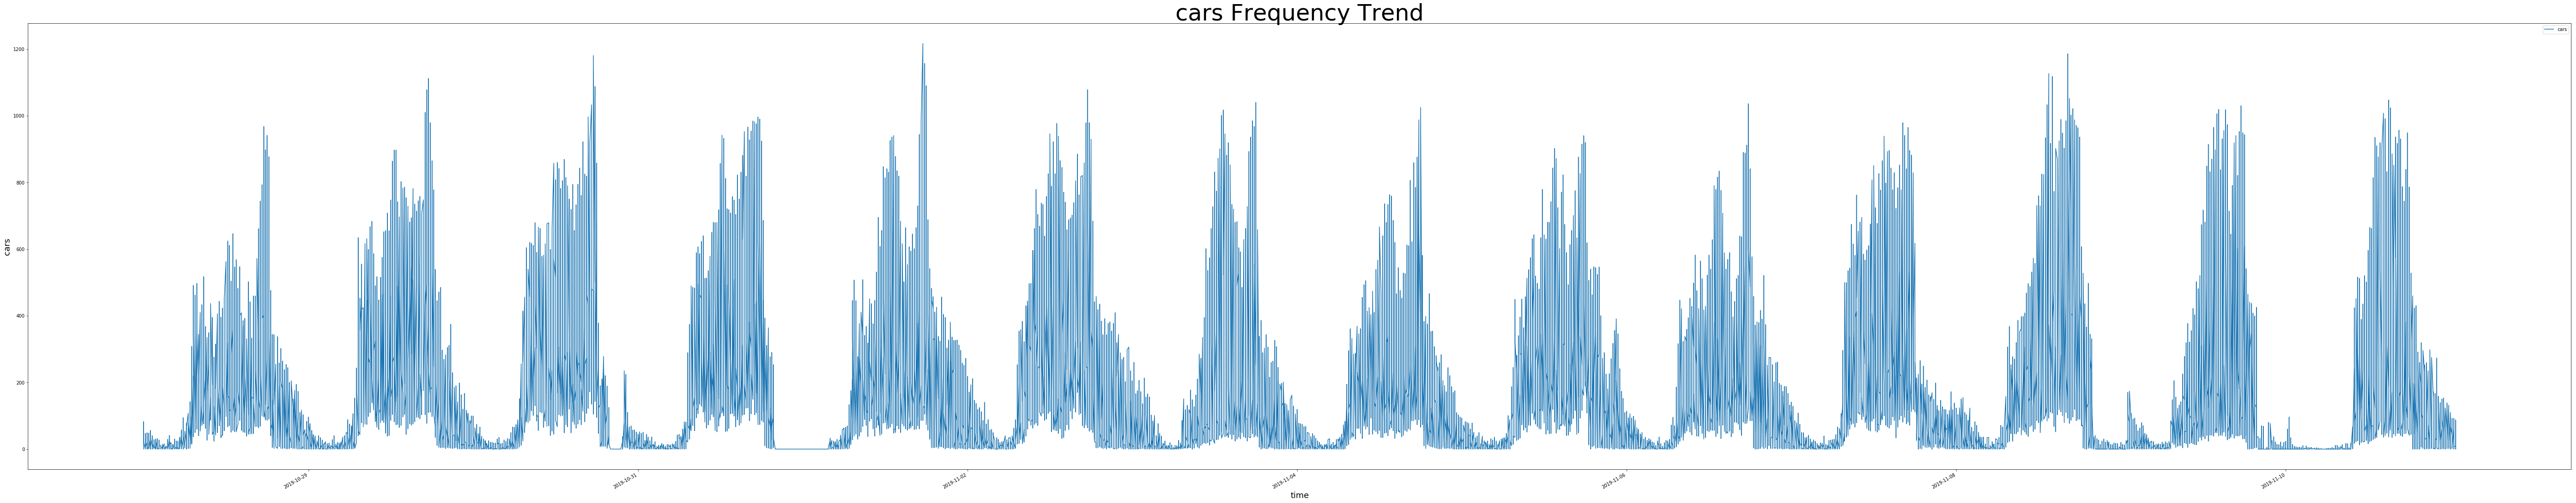

<Figure size 432x288 with 0 Axes>

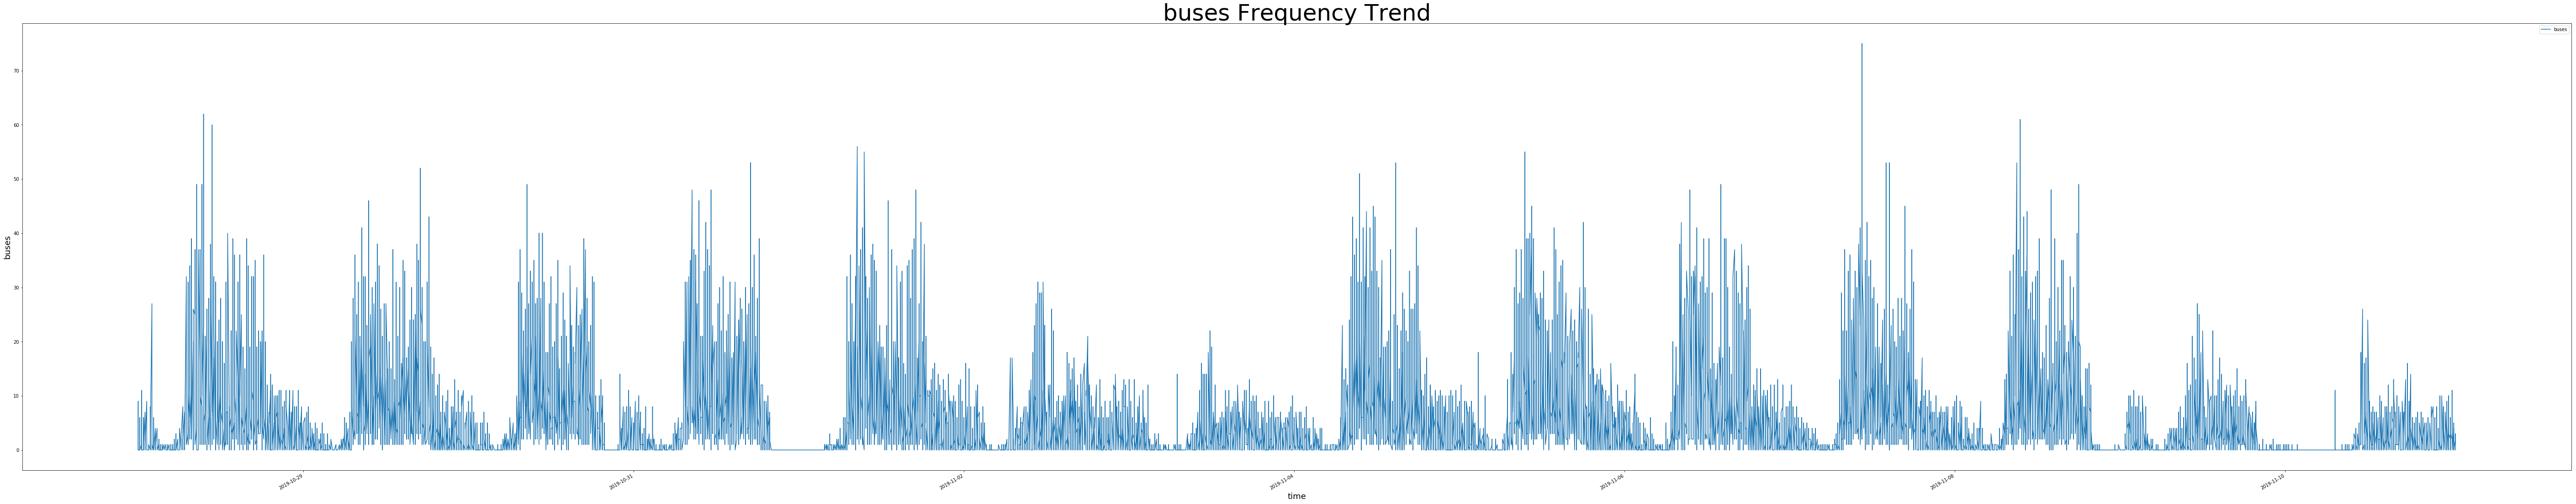

<Figure size 432x288 with 0 Axes>

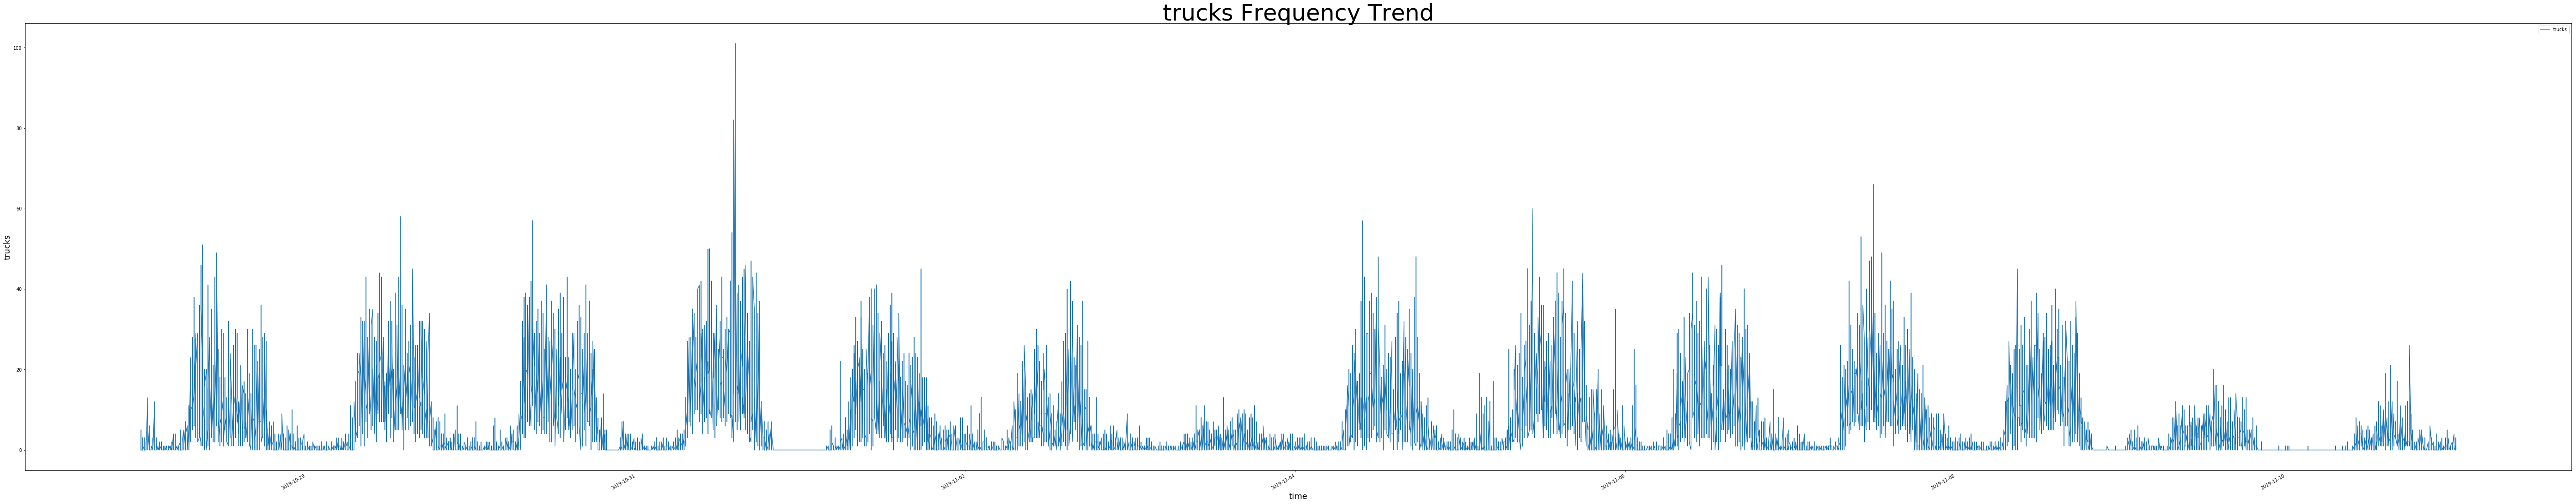

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(8,30))

for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    Dots.plot('time',types,figsize=(100,20))

    plt.xlabel('time', fontsize =18)
    plt.ylabel(types,fontsize =18)
    plt.title(types + ' Frequency Trend',fontsize =50, color = "k")
    plt.savefig("figs/" + types +".png",dpi=100) 
    plt.figure()
    
    plt.show()


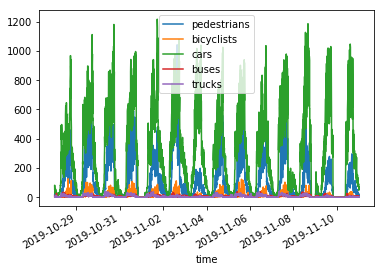

In [17]:
Dots[Dots['location_5']== "Baltimore Avenue & Regents Drive (South Gate)"].plot(kind = 'line', 
                                                                            y = ['pedestrians','bicyclists','cars','buses','trucks'],
                                                                           x = 'time')

## Investigate the influences of Weather

1. Load csv data, interprete the data, 
Temperature/wind vs Walk/Bike: Daily (Min temperature at 9)



In [18]:
weather_dot=pd.read_csv('Wunderground_Weather_NumbersOnly - Sheet1.csv')
weather_dot=weather_dot[['Day','Time','Temperature_F', 'Wind_Speed_MPH','Wind_Gust_MPH']]


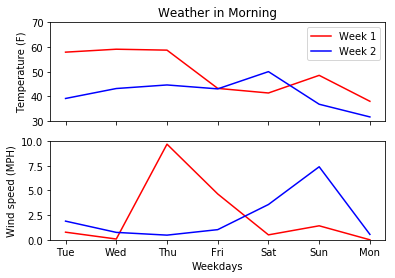

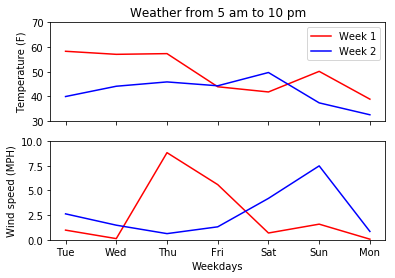

In [61]:
weather_dot['hour']=weather_dot.Time.apply(lambda x:int(x.split(":", 1)[0]))
weather_dot['is_morning']=weather_dot['hour'].apply(lambda x: x<=10 and x>=5)
weater_dot_morning=weather_dot[weather_dot['is_morning']==True]
weater_dot_morning=weater_dot_morning[["Day","Temperature_F","Wind_Speed_MPH",'Wind_Gust_MPH']]
weater_dot_morning_ave=weater_dot_morning.groupby('Day').mean()
x=['Tue','Wed','Thu','Fri','Sat','Sun','Mon']
y1_temp=weater_dot_morning_ave['Temperature_F'].values[0:7]
y2_temp=weater_dot_morning_ave['Temperature_F'].values[7:]
y1_wind=weater_dot_morning_ave['Wind_Speed_MPH'].values[0:7]
y2_wind=weater_dot_morning_ave['Wind_Speed_MPH'].values[7:]

fig = plt.figure()
ax = plt.subplot(211)
ax.plot(x, y1_temp, label='Week 1',color='r')
ax.plot(x, y2_temp, label='Week 2',color='b')
ax.legend()
#plt.xlabel('Weekdays')
plt.ylabel('Temperature (F)')
plt.title('Weather in Morning', color = "k")
plt.tick_params(labelbottom=False)
ax.set_ylim([30,70])

ax = plt.subplot(212)
ax.plot(x, y1_wind, label='Week 1',color='r')
ax.plot(x, y2_wind, label='Week 2',color='b')
#ax.legend()
plt.xlabel('Weekdays')
plt.ylabel('Wind speed (MPH)')
#plt.title('Wind in Morning', color = "k")
ax.set_ylim([0,10])
plt.show()

weather_dot['hour']=weather_dot.Time.apply(lambda x:int(x.split(":", 1)[0]))
weather_dot['is_day']=weather_dot['hour'].apply(lambda x: x<=22 and x>=5)
weater_dot_day=weather_dot[weather_dot['is_day']==True]
weater_dot_day=weater_dot_day[["Day","Temperature_F","Wind_Speed_MPH",'Wind_Gust_MPH']]
weater_dot_day_ave=weater_dot_day.groupby('Day').mean()
x=['Tue','Wed','Thu','Fri','Sat','Sun','Mon']
y1_temp=weater_dot_day_ave['Temperature_F'].values[0:7]
y2_temp=weater_dot_day_ave['Temperature_F'].values[7:]
y1_wind=weater_dot_day_ave['Wind_Speed_MPH'].values[0:7]
y2_wind=weater_dot_day_ave['Wind_Speed_MPH'].values[7:]

fig = plt.figure()
ax = plt.subplot(211)
ax.plot(x, y1_temp, label='Week 1',color='r')
ax.plot(x, y2_temp, label='Week 2',color='b')
ax.legend()
ax.set_ylim([30,70])
#plt.xlabel('Weekdays')
plt.ylabel('Temperature (F)')
plt.title('Weather from 5 am to 10 pm', color = "k")
plt.tick_params(labelbottom=False)

ax = plt.subplot(212)
ax.plot(x, y1_wind, label='Week 1',color='r')
ax.plot(x, y2_wind, label='Week 2',color='b')
#ax.legend()
plt.xlabel('Weekdays')
plt.ylabel('Wind speed (MPH)')
#plt.title('Wind in Morning', color = "k")
ax.set_ylim([0,10])
plt.show()

In [36]:
weater_dot_morning_ave

Temperature_F  Wind_Speed_MPH  Wind_Gust_MPH
Day                                                     
10/29/2019      57.942857        0.771429       0.000000
10/30/2019      59.131579        0.078947       0.000000
10/31/2019      58.756757        9.675676      13.162162
11/1/2019       43.277778        4.638889       4.166667
11/10/2019      41.416667        0.500000       0.000000
11/11/2019      48.555556        1.416667       0.000000
11/2/2019       38.055556        0.000000       0.000000
11/3/2019       39.194444        1.888889       1.694444
11/4/2019       43.222222        0.750000       0.000000
11/5/2019       44.666667        0.472222       0.000000
11/6/2019       43.083333        1.027778       0.000000
11/7/2019       50.057143        3.571429       0.457143
11/8/2019       36.861111        7.388889       5.805556
11/9/2019       31.727273        0.545455       0.000000

### Investigate the influence of temperature

### Merge sensor type

In [21]:
Dots_sensor_1=Dots[Dots['location_5']=='Campus Drive & Paint Branch Drive']
Dots_sensor_other=Dots[Dots['location_5']!='Campus Drive & Paint Branch Drive']
Dots_sensor_2=Dots[Dots['location_5']=='Stadium Drive & Regents Drive']
Dots_sensor_other=Dots_sensor_other[Dots_sensor_other['location_5']!='Stadium Drive & Regents Drive']
Dots_sensor_3=Dots[Dots['location_5']=='Baltimore Avenue & Regents Drive (South Gate)']
Dots_sensor_other=Dots_sensor_other[Dots_sensor_other['location_5']!='Baltimore Avenue & Regents Drive (South Gate)']

Dots_sensor_1=Dots_sensor_1.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_2=Dots_sensor_2.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_3=Dots_sensor_3.groupby(['time','location_5','Date','StartTime'],as_index=False).mean()
Dots_sensor_other=Dots_sensor_other.drop(columns=['location'])

for i in ['pedestrians','bicyclists','cars','buses','trucks']:
    Dots_sensor_2[i]=Dots_sensor_2[i]*2

Dots_mod=Dots_sensor_1.append([Dots_sensor_2,Dots_sensor_3,Dots_sensor_other],ignore_index=False)


D:\Users\mrzcl\Anaconda3\envs\homework1\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


Cold/Hot Date 2019-10-30 and 2019-11-06

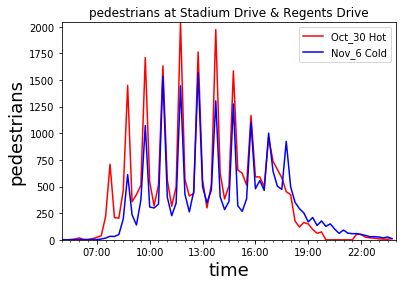

p = 0.2843955382414204


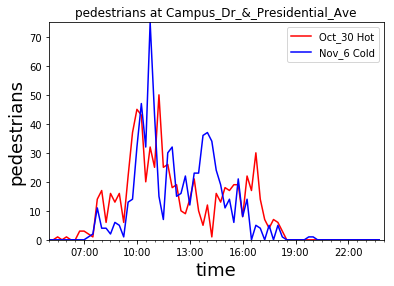

p = 0.8619998878104194


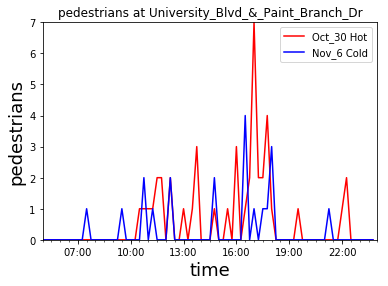

p = 0.05770533275335245


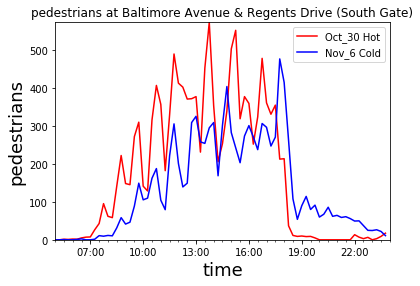

p = 0.16954632204426745


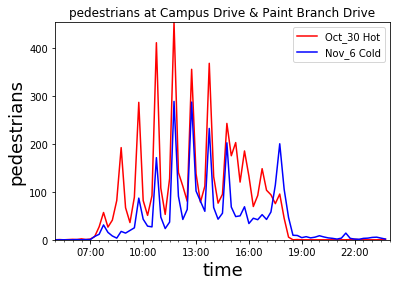

p = 0.02610375584769009


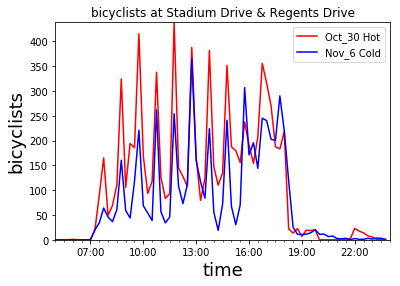

p = 0.08086438901681138


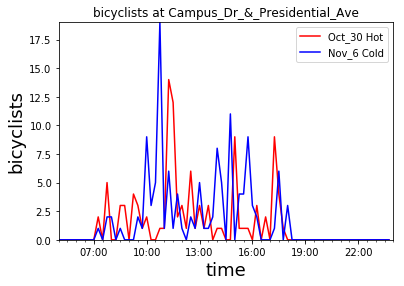

p = 0.5553220586823884


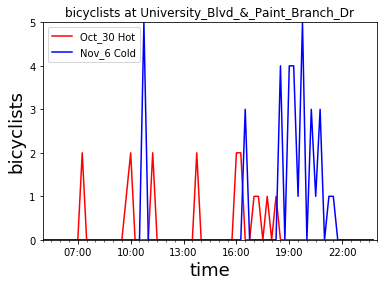

p = 0.25793641738575385


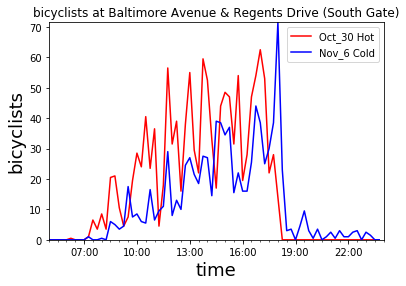

p = 0.08885077164885677


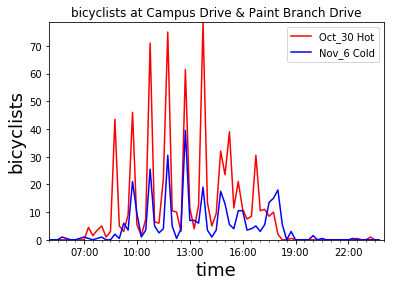

p = 0.019033652992889612


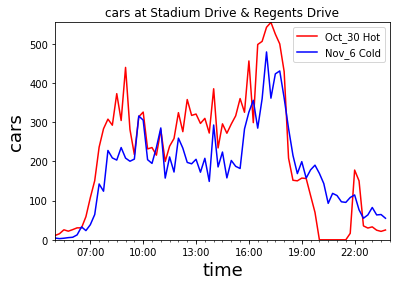

p = 0.1945759274664092


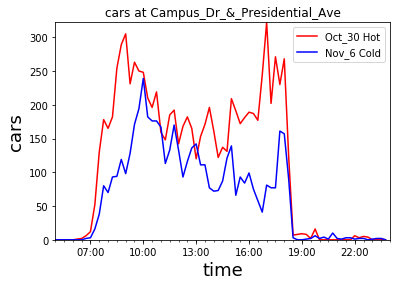

p = 0.002186206406515636


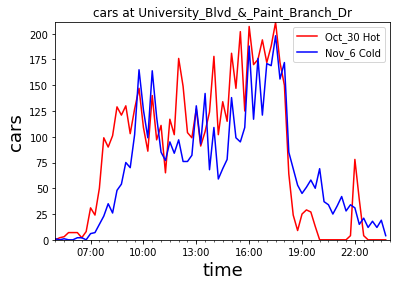

p = 0.3558400237814805


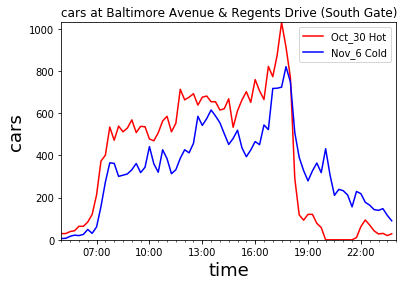

p = 0.34987372950326967


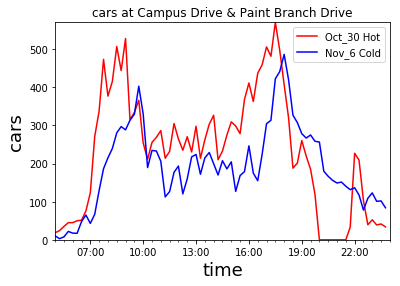

p = 0.16544172547565103


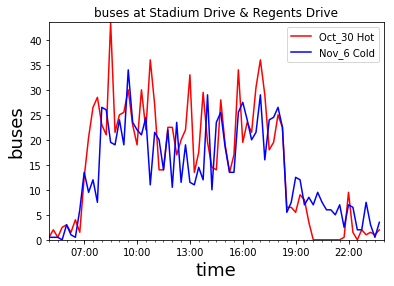

p = 0.5992753238681127


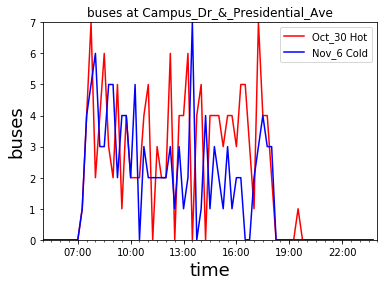

p = 0.19699709312853497


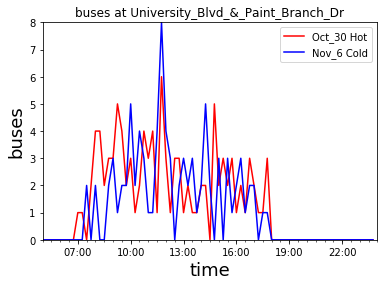

p = 0.46945917927933256


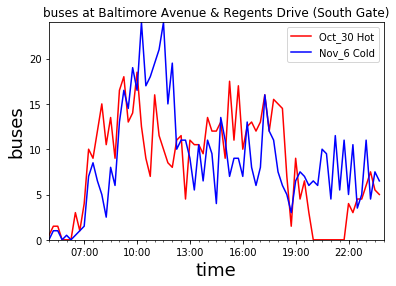

p = 0.40806258516769234


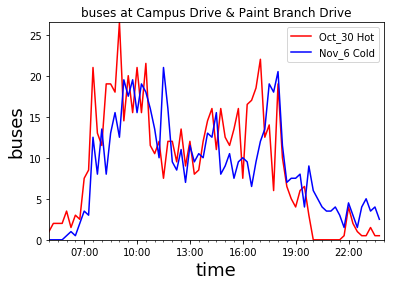

p = 0.816100292938709


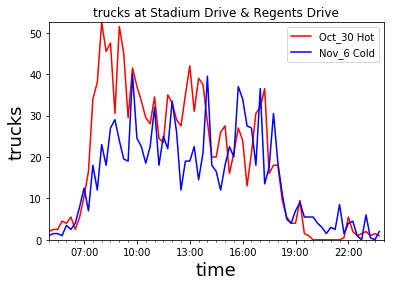

p = 0.08680267900664554


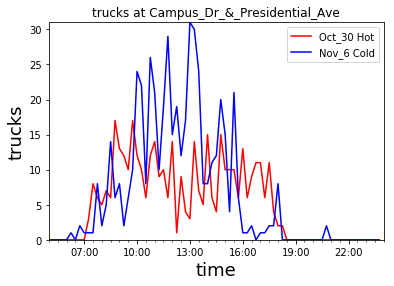

p = 0.26179249018638145


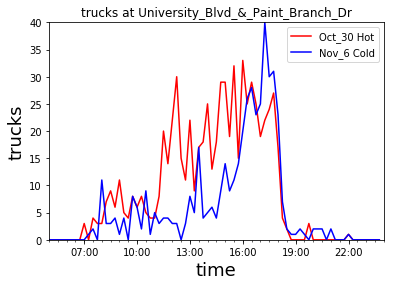

p = 0.0681640070046579


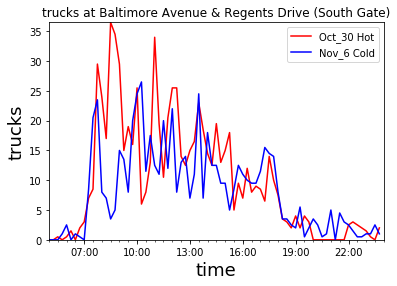

p = 0.3467873642382343


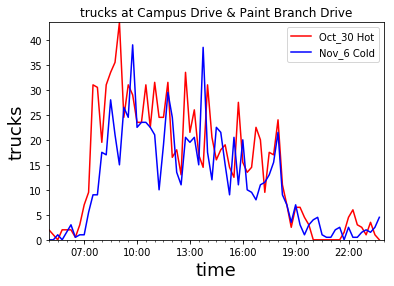

p = 0.15458798281334635


In [22]:
data_Nov_6=Dots_mod[Dots_mod['Date']=='2019-11-06']
data_Oct_30=Dots_mod[Dots_mod['Date']=='2019-10-30']

for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for locs in ['Stadium Drive & Regents Drive','Campus_Dr_&_Presidential_Ave','University_Blvd_&_Paint_Branch_Dr',
                 'Baltimore Avenue & Regents Drive (South Gate)','Campus Drive & Paint Branch Drive']:
        value1=data_Oct_30[data_Oct_30['location_5']==locs]
        value2=data_Nov_6[data_Nov_6['location_5']==locs]
        x=value1.time
        y1=value1[types]
        y2=value2[types]
        start_time=x.values[0]+np.timedelta64(5,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Oct_30 Hot',color='r')
        ax.plot(x, y2, label='Nov_6 Cold',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =18)
        plt.ylabel(types,fontsize =18)
        plt.title(types + ' at '+locs, color = "k")
        plt.margins(0)
        plt.show()
        
        var_1 = y1.values.var(ddof=1)
        var_2 = y2.values.var(ddof=1)
        s = np.sqrt((var_1 + var_2)/2)
        N=y1.values.size
        t = (y1.values.mean() - y2.values.mean())/(s*np.sqrt(2/N))
        df = 2*N - 2
        p = 1 - stats.t.cdf(t,df=df)
        t2, p2 = stats.ttest_ind(y1.values,y2.values)
        print("p = " + str(p2))

Cold/Hot Date 2019-11-01 and 2019-11-08

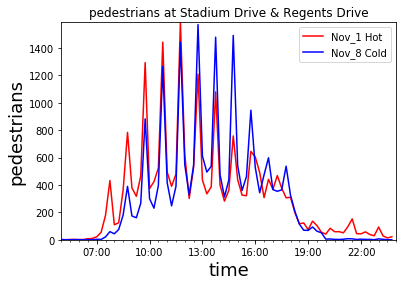

p = 0.801977891156116


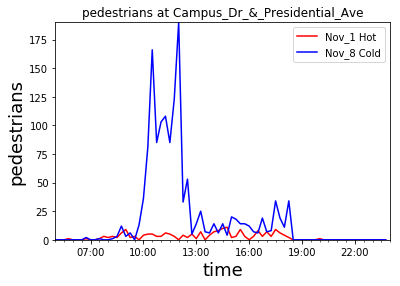

p = 1.9996573782077256


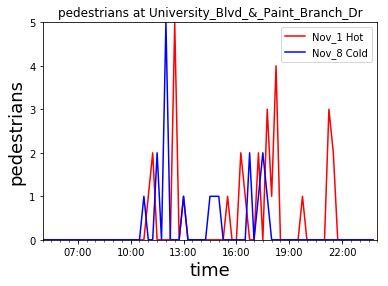

p = 0.30431627132480576


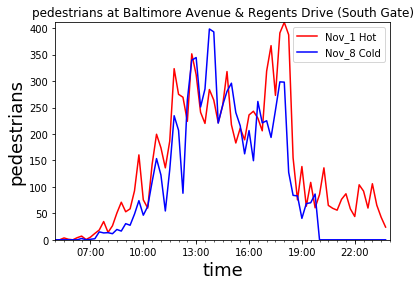

p = 0.11503869899825592


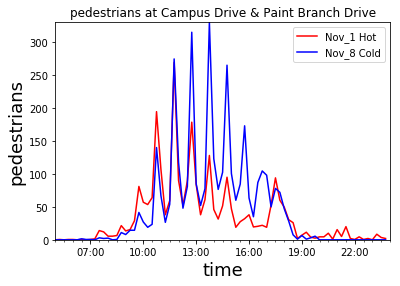

p = 1.721447338254538


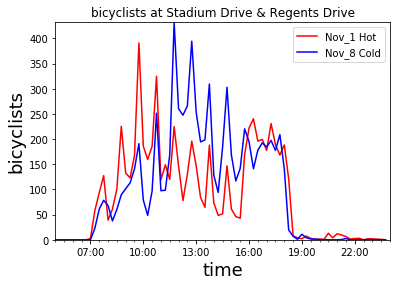

p = 1.4024421141861492


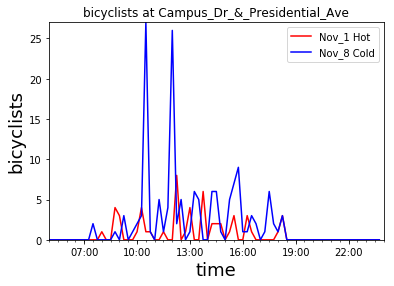

p = 1.974242702441812


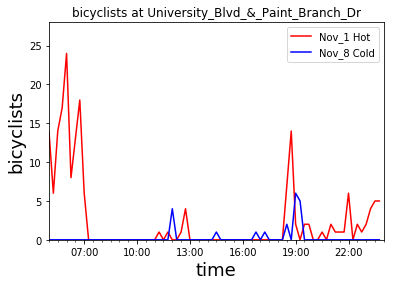

p = 0.06747838919460869


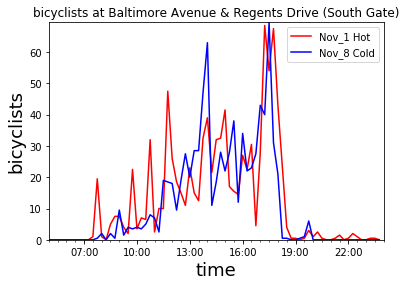

p = 0.5839166019740403


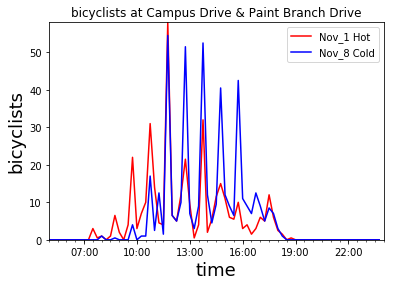

p = 1.526656787952618


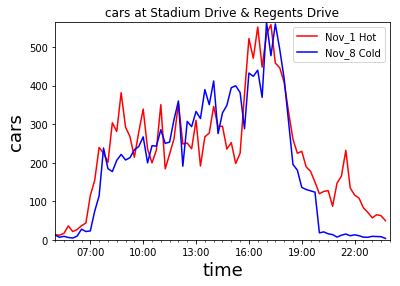

p = 0.4577595237807959


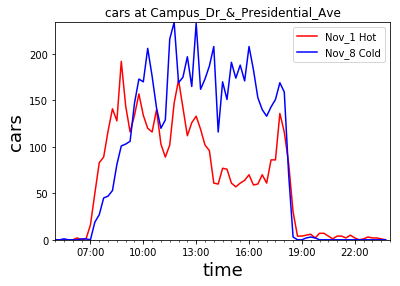

p = 1.9463846814795673


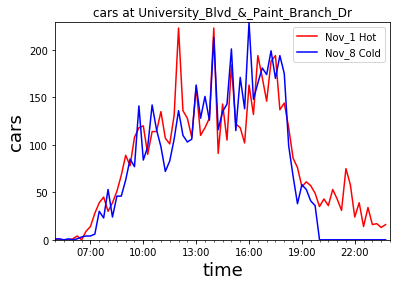

p = 0.5075679345867907


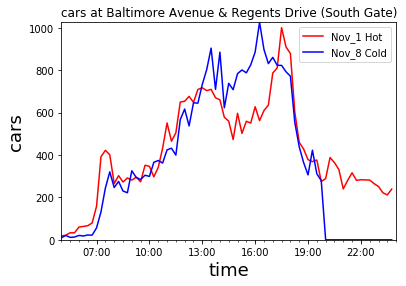

p = 0.5731732267240615


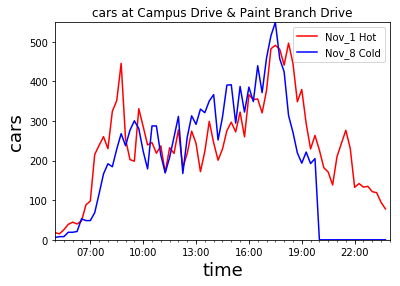

p = 0.21546055055361135


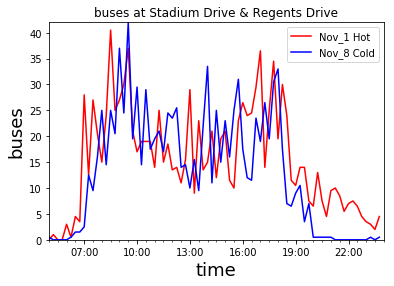

p = 0.298326389092882


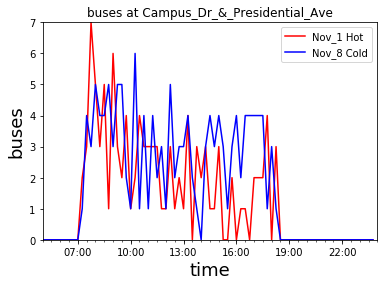

p = 1.8353366822961827


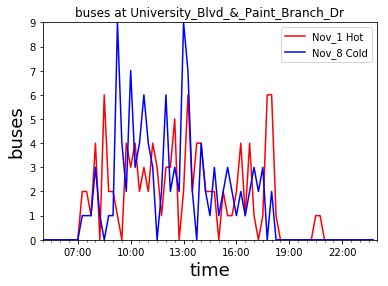

p = 1.1541259491299458


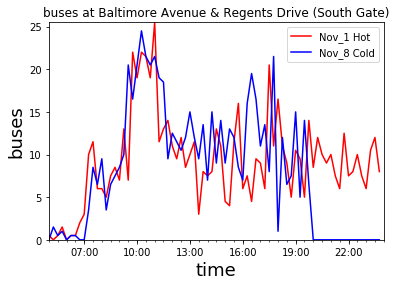

p = 0.893558928081575


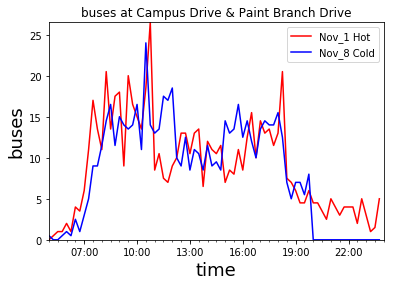

p = 0.6016026635282197


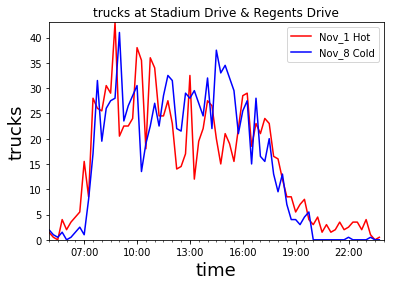

p = 0.9652356285005153


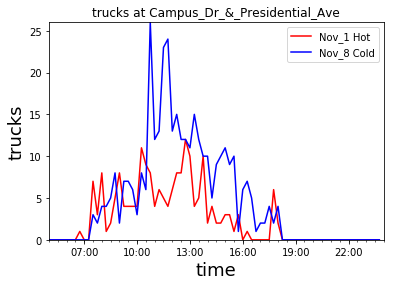

p = 1.9917233945043993


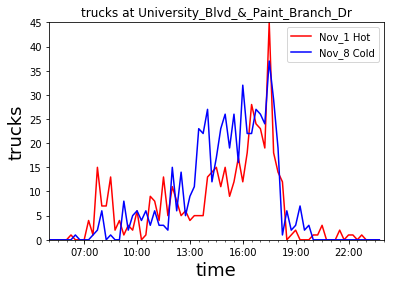

p = 1.6158961210230811


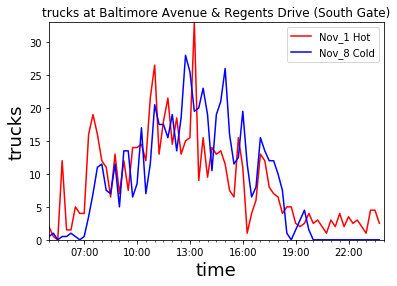

p = 0.9301298808065126


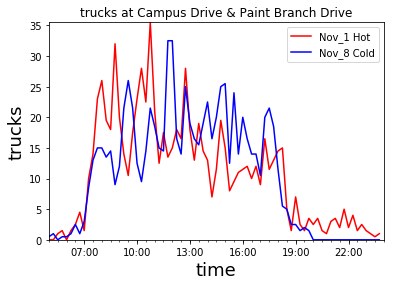

p = 1.0350324379019984


In [23]:
data_Nov_8=Dots_mod[Dots_mod['Date']=='2019-11-08']
data_Nov_1=Dots_mod[Dots_mod['Date']=='2019-11-01']

for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for locs in ['Stadium Drive & Regents Drive','Campus_Dr_&_Presidential_Ave','University_Blvd_&_Paint_Branch_Dr',
                 'Baltimore Avenue & Regents Drive (South Gate)','Campus Drive & Paint Branch Drive']:
        value1=data_Nov_1[data_Nov_1['location_5']==locs]
        value2=data_Nov_8[data_Nov_8['location_5']==locs]
        x=value1.time
        y1=value1[types]
        y2=value2[types]
        start_time=x.values[0]+np.timedelta64(5,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Nov_1 Hot',color='r')
        ax.plot(x, y2, label='Nov_8 Cold',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =18)
        plt.ylabel(types,fontsize =18)
        plt.title(types + ' at '+locs, color = "k")
        plt.margins(0)
        plt.show()
        
        var_1 = y1.values.var(ddof=1)
        var_2 = y2.values.var(ddof=1)
        s = np.sqrt((var_1 + var_2)/2)
        N=y1.values.size
        t = (y1.values.mean() - y2.values.mean())/(s*np.sqrt(2/N))
        df = 2*N - 2
        p = 1 - stats.t.cdf(t,df=df)
        print("p = " + str(2*p))

Wind Date 2019-10-30 and 2019-10-31

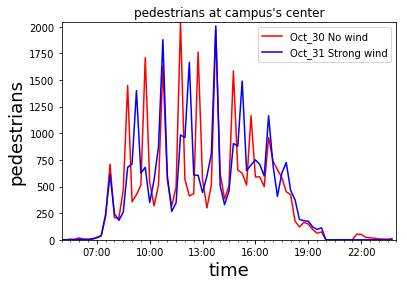

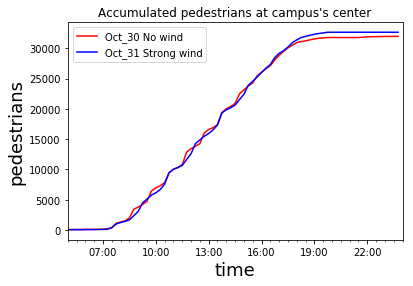

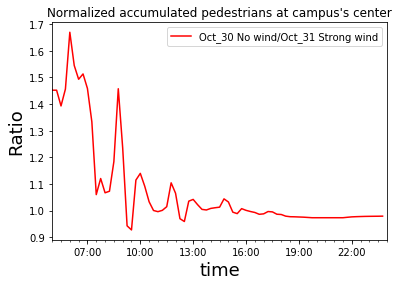

p = 1.0834592280122641


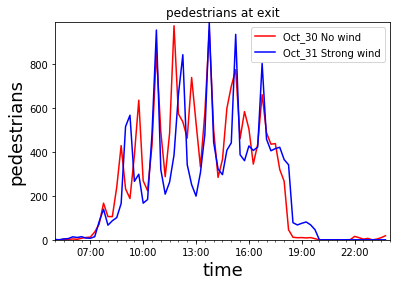

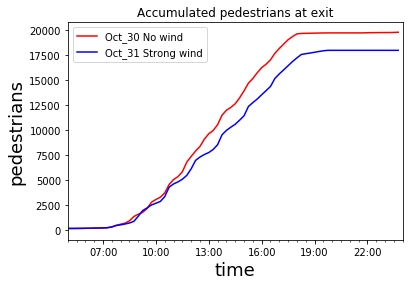

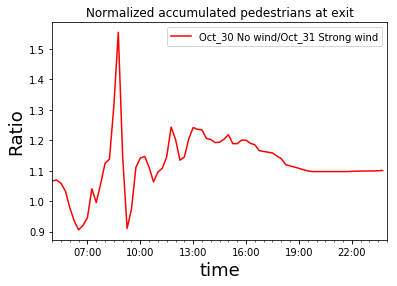

p = 0.6087706815334593


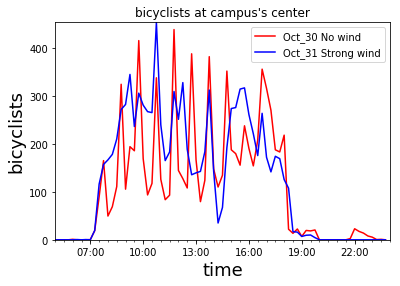

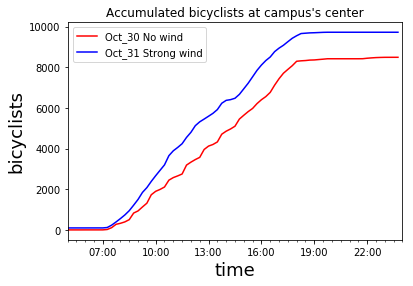

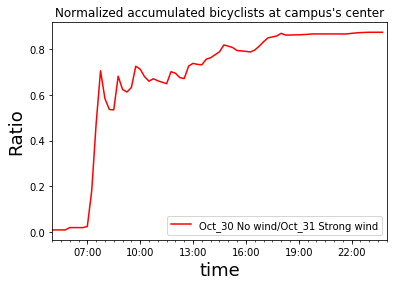

p = 1.5453792680939746


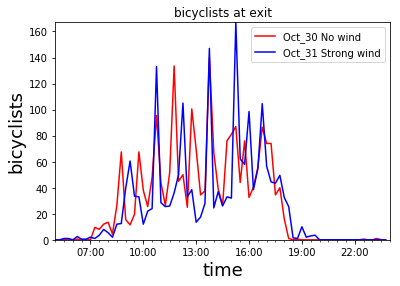

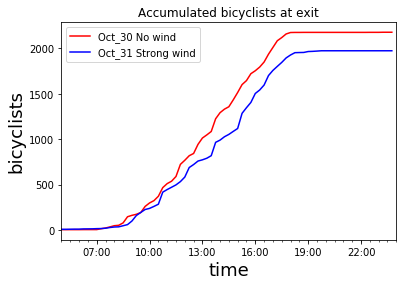

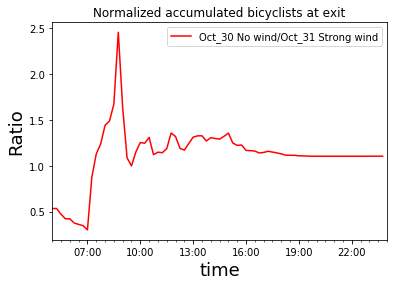

p = 0.6561350667193084


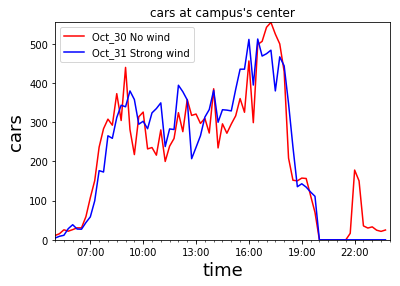

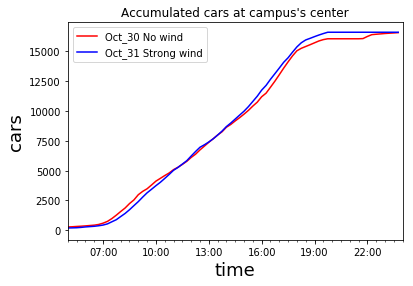

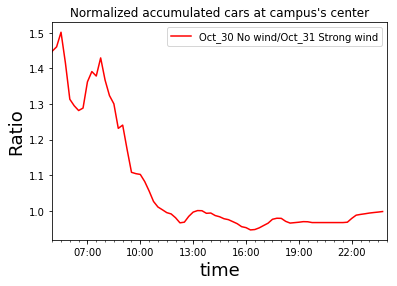

p = 1.0114442185009977


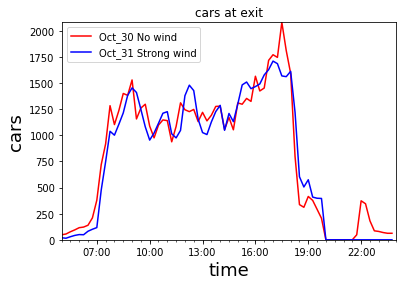

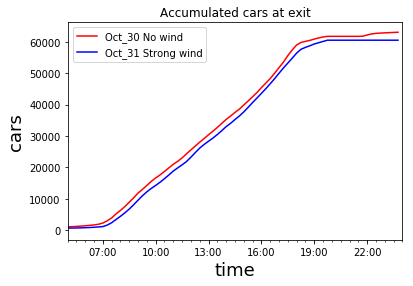

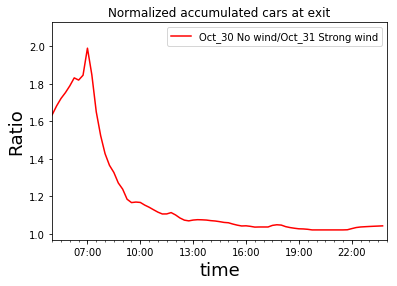

p = 0.7695154221054104


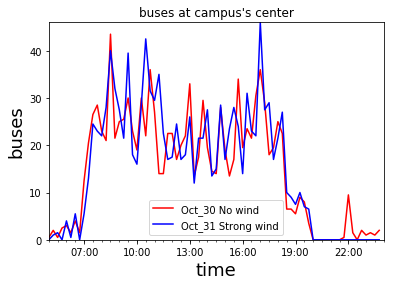

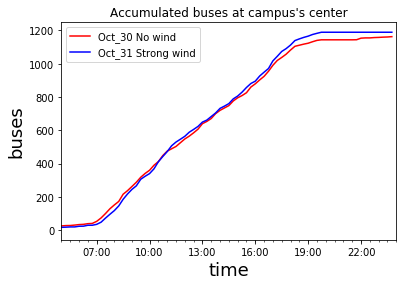

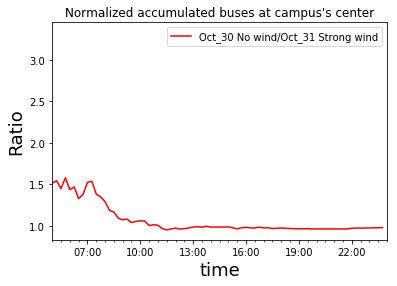

p = 1.1232238201694869


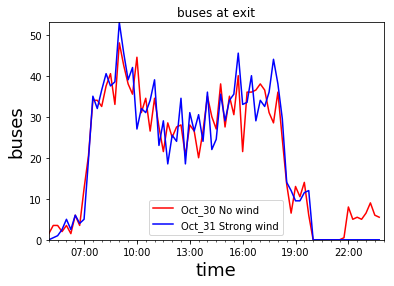

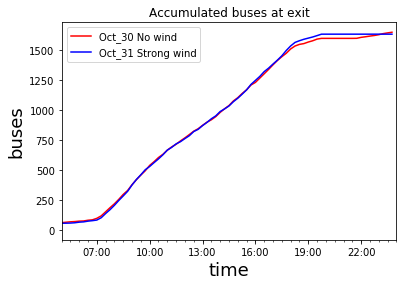

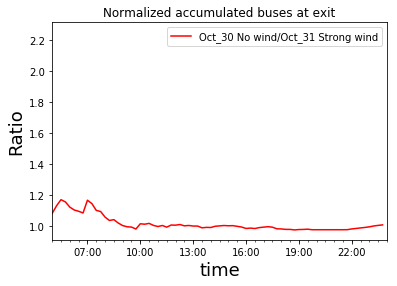

p = 0.9406014778923624


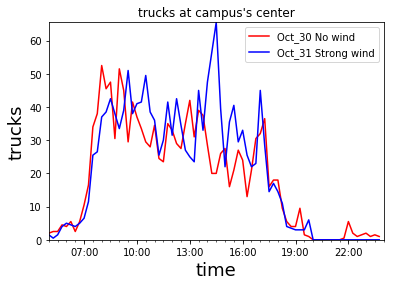

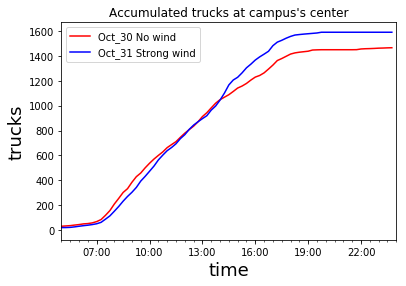

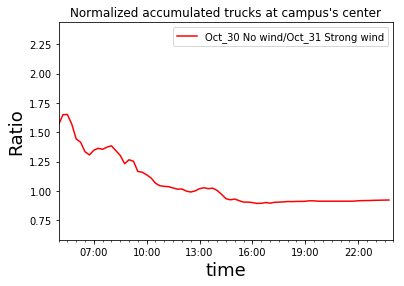

p = 1.4032718442988388


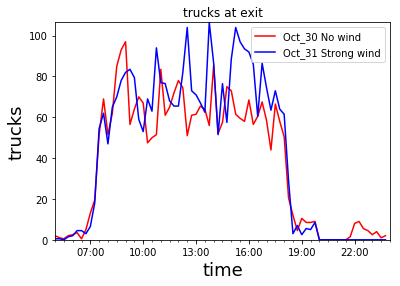

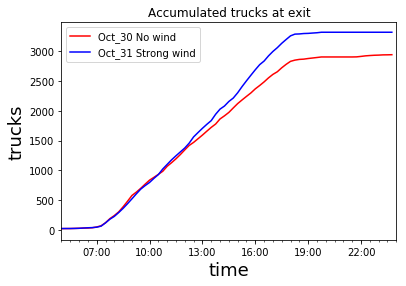

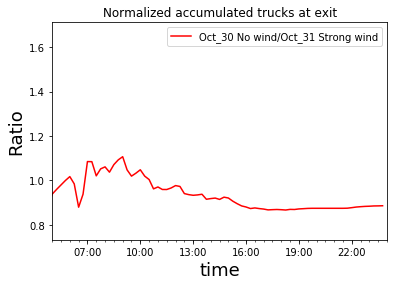

p = 1.5665366484943017


In [81]:
Dots_mod['in_campus']=Dots_mod['location_5'].apply(lambda x:x=='Stadium Drive & Regents Drive')
Dots_mod3=Dots_mod.drop(columns=['location_5'])
Dots_mod4=Dots_mod3.groupby(['time','in_campus','Date','StartTime'],as_index=False).sum()
data_Oct_31_4=Dots_mod4[Dots_mod4['Date']=='2019-10-31']
data_Oct_30_4=Dots_mod4[Dots_mod4['Date']=='2019-10-30']

#data_Nov_6_4['time']=data_Nov_6_4['time'].apply(lambda x:rounded_every_60(x))
#data_Oct_30_4['time']=data_Oct_30_4['time'].apply(lambda x:rounded_every_60(x))
#data_Oct_30_4=data_Oct_30_4.drop(columns=['StartTime'])
#data_Nov_6_4=data_Nov_6_4.drop(columns=['StartTime'])
#data_Oct_30_4=data_Oct_30_4.groupby(['time','in_campus','Date'],as_index=False).max()
#data_Nov_6_4=data_Nov_6_4.groupby(['time','in_campus','Date'],as_index=False).max()


for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for in_campus in [True, False]:
        if in_campus==True:
            loc="campus's center"
        else:
            loc='exit'
        
        value1=data_Oct_30_4[data_Oct_30_4['in_campus']==in_campus]
        value2=data_Oct_31_4[data_Oct_31_4['in_campus']==in_campus]
        x=value1.time
        y1=value1[types]
        y1_acc=np.cumsum(y1.values)
        y2=value2[types]
        y2_acc=np.cumsum(y2.values)
        
        
        start_time=x.values[0]+np.timedelta64(5,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Oct_30 No wind',color='r')
        ax.plot(x, y2, label='Oct_31 Strong wind',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =18)
        plt.ylabel(types,fontsize =18)
        plt.title(types + ' at '+loc, color = "k")
        plt.margins(0)
        plt.show()
        
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1_acc, label='Oct_30 No wind',color='r')
        ax.plot(x, y2_acc, label='Oct_31 Strong wind',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =18)
        plt.ylabel(types,fontsize =18)
        plt.title('Accumulated '+ types + ' at '+loc, color = "k")
        plt.show()
        
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1_acc/y2_acc, label='Oct_30 No wind/Oct_31 Strong wind',color='r')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =18)
        plt.ylabel('Ratio',fontsize =18)
        plt.title('Normalized accumulated '+ types + ' at '+loc, color = "k")
        plt.show()
        
        #calculate p-value
        #print(x.values[5])
        var_1 = y1.values.var(ddof=1)
        var_2 = y2.values.var(ddof=1)
        s = np.sqrt((var_1 + var_2)/2)
        N=y1.values.size
        t = (y1.values.mean() - y2.values.mean())/(s*np.sqrt(2/N))
        df = 2*N - 2
        p = 1 - stats.t.cdf(t,df=df)
        print("p = " + str(2*p))
        

## Eliminate the influence of class schedule using average number per hour

In [25]:
data_Nov_6['hour']=data_Nov_6['StartTime'].apply(lambda x:x.hour)
data_Nov_6_2=data_Nov_6[data_Nov_6['hour']>=5]
data_Nov_6_2=data_Nov_6_2[data_Nov_6_2['hour']<=23]
data_Nov_6_2=data_Nov_6_2.drop(columns=['time','StartTime'])

data_Oct_30['hour']=data_Oct_30['StartTime'].apply(lambda x:x.hour)
data_Oct_30_2=data_Oct_30[data_Oct_30['hour']>=5]
data_Oct_30_2=data_Oct_30_2[data_Oct_30_2['hour']<=23]
data_Oct_30_2=data_Oct_30_2.drop(columns=['time','StartTime'])
data_Nov_6_3=data_Nov_6_2.groupby(['hour','location_5','Date'],as_index=False).mean()
data_Oct_30_3=data_Oct_30_2.groupby(['hour','location_5','Date'],as_index=False).mean()

D:\Users\mrzcl\Anaconda3\envs\homework1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Users\mrzcl\Anaconda3\envs\homework1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


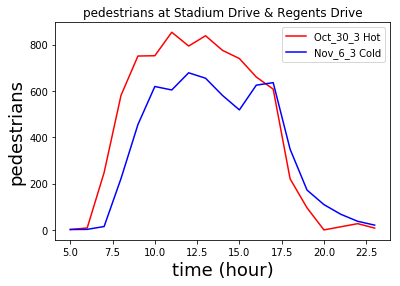

p=0.4140054863780469


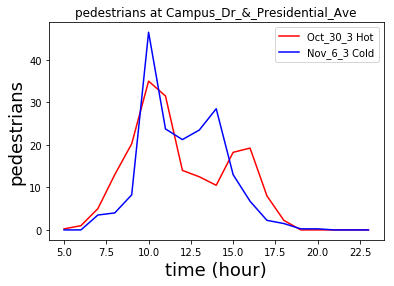

p=0.9202012279599981


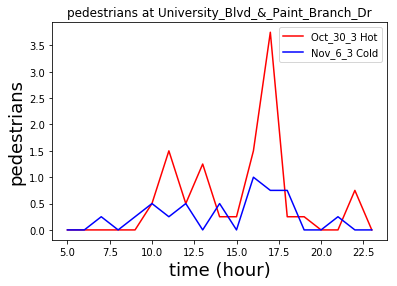

p=0.18516866322585537


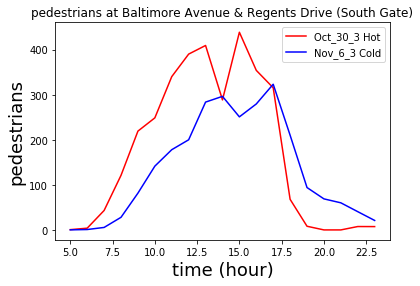

p=0.43282078128162627


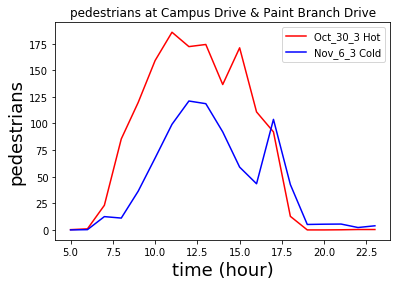

p=0.11306078176092413


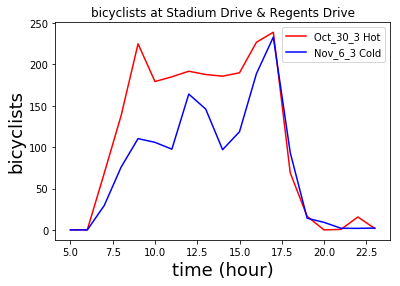

p=0.2310218305694367


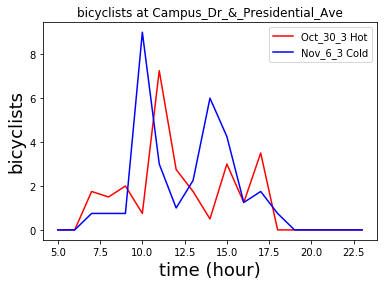

p=0.6796273721876227


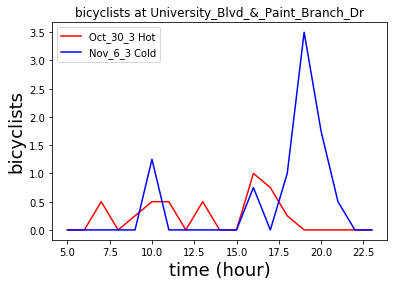

p=0.2865646233154745


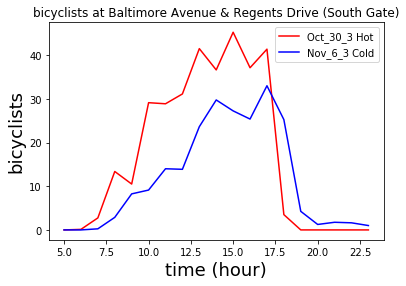

p=0.29714372047462523


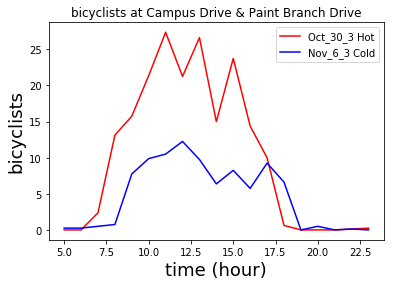

p=0.04406143114759978


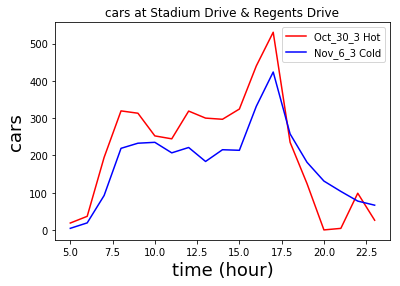

p=0.4206480540680485


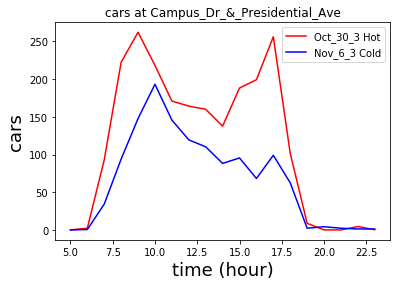

p=0.0766966165840609


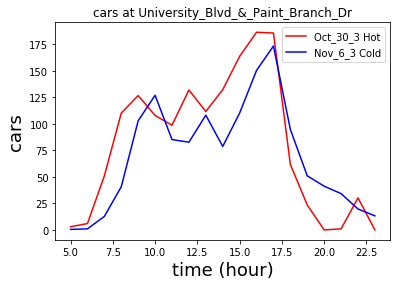

p=0.5785233975472667


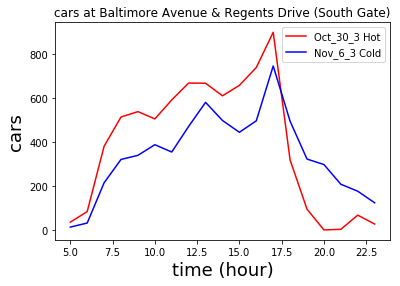

p=0.5699899328429315


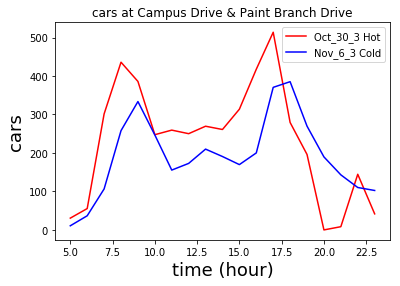

p=0.35393287890981884


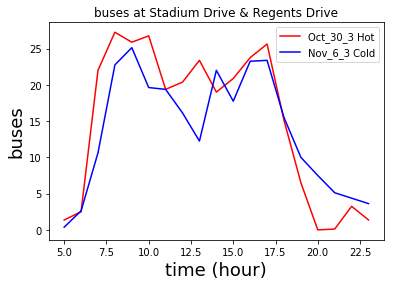

p=0.6922581602459614


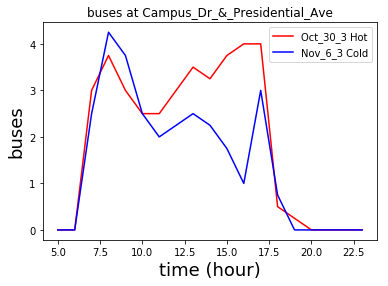

p=0.37981071409429645


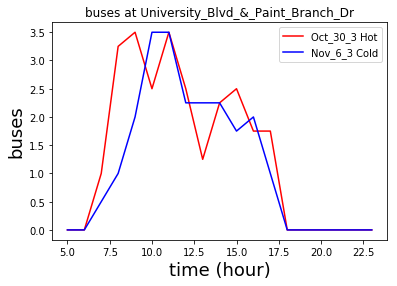

p=0.6408620775272597


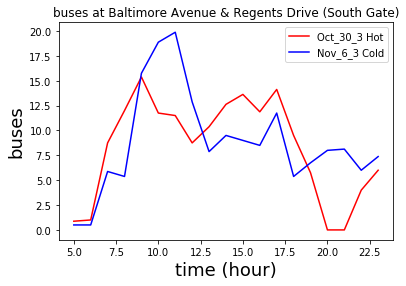

p=0.7535444966967143


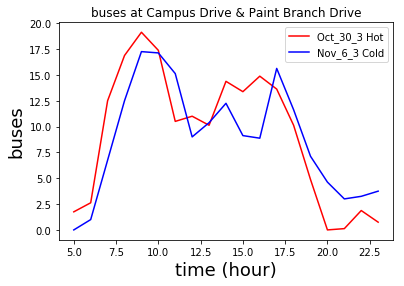

p=0.8384283141937268


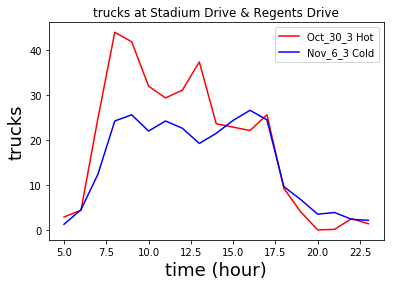

p=0.3293126528054884


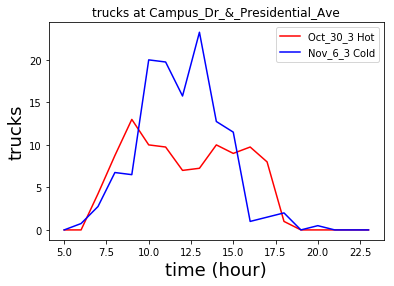

p=0.5095533127205818


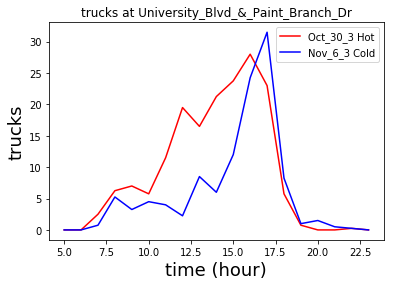

p=0.31154896182511344


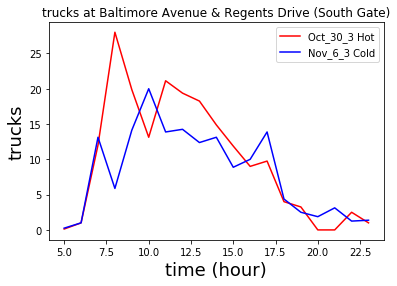

p=0.46726323005357706


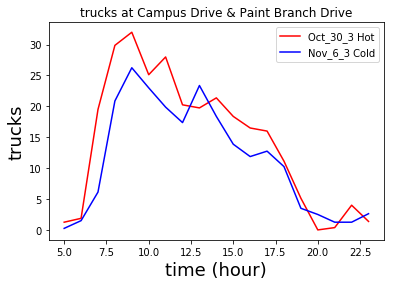

p=0.3746684019771085


In [26]:
for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for locs in ['Stadium Drive & Regents Drive','Campus_Dr_&_Presidential_Ave','University_Blvd_&_Paint_Branch_Dr',
                 'Baltimore Avenue & Regents Drive (South Gate)','Campus Drive & Paint Branch Drive']:
        value1=data_Oct_30_3[data_Oct_30_3['location_5']==locs]
        value2=data_Nov_6_3[data_Nov_6_3['location_5']==locs]
        x=value1.hour
        y1=value1[types]
        y2=value2[types]
        start_time=x.values[0]+np.timedelta64(6,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Oct_30_3 Hot',color='r')
        ax.plot(x, y2, label='Nov_6_3 Cold',color='b')
        ax.legend()
        plt.xlabel('time (hour)', fontsize =18)
        plt.ylabel(types,fontsize =18)
        plt.title(types + ' at '+locs, color = "k")
    
        plt.show()
        t2, p2 = stats.ttest_ind(y1.values,y2.values)
        print ('p='+str(p2))

### Group sensor as entry/exit and in campus

In [27]:
def rounded_every_60(a):
        return a-np.timedelta64(a.minute,'m')


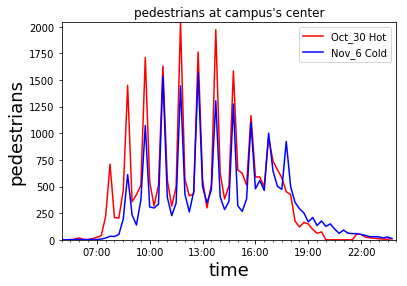

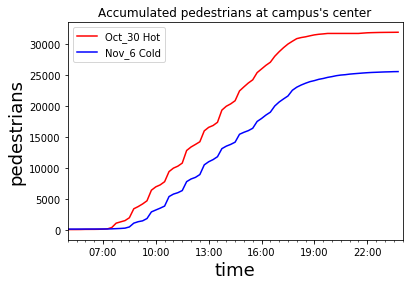

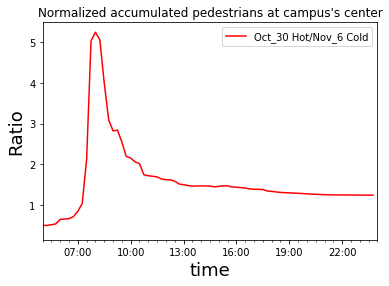

p = 0.2843955382414203


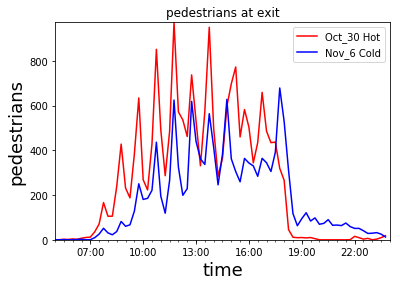

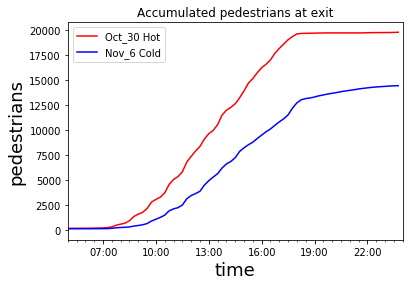

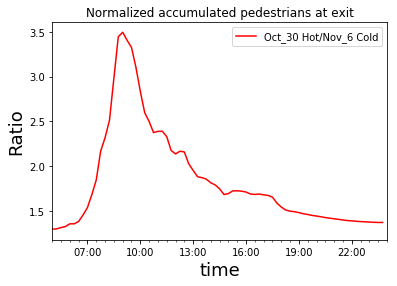

p = 0.08831899295375445


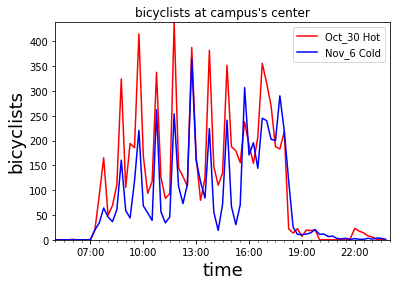

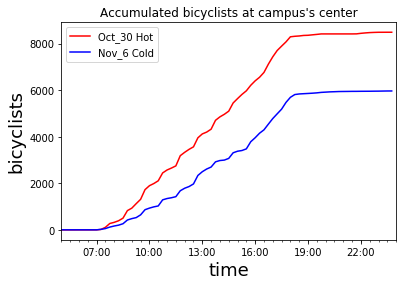

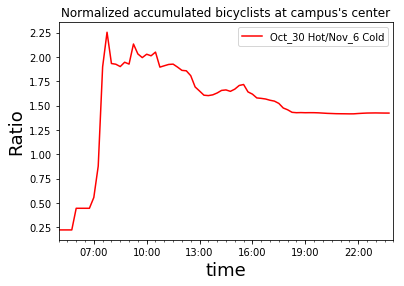

p = 0.08086438901681126


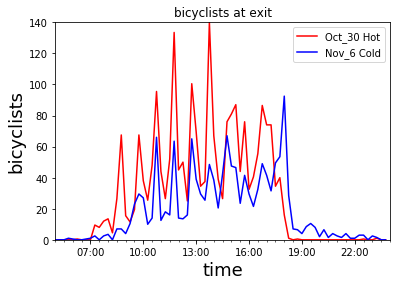

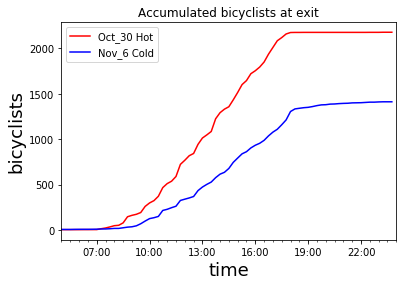

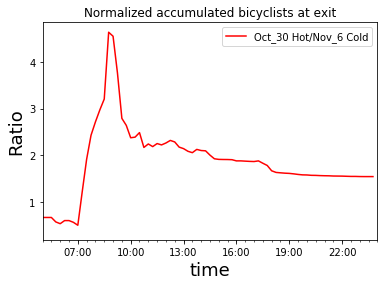

p = 0.043864945855070836


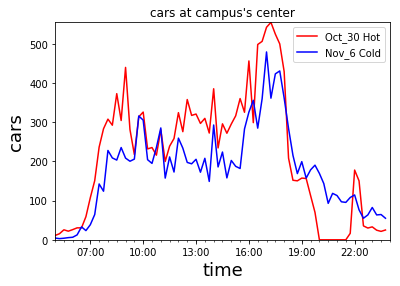

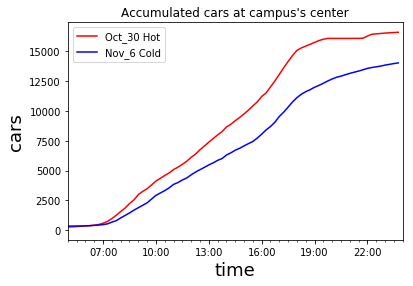

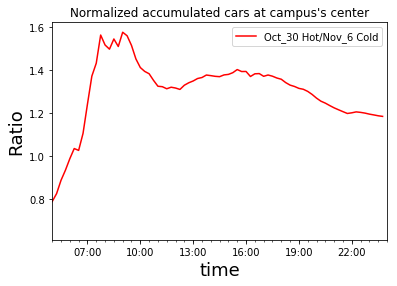

p = 0.19457592746640917


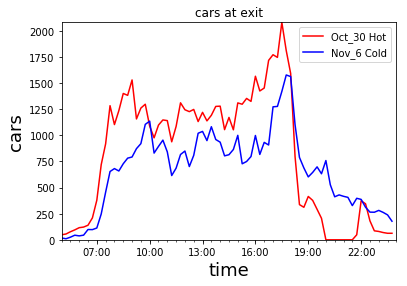

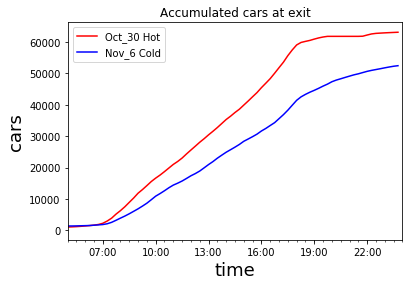

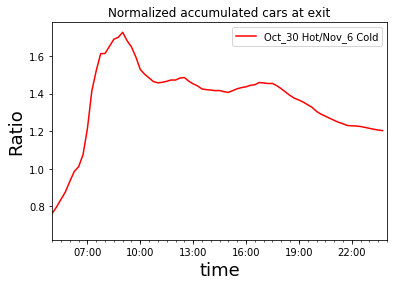

p = 0.14713938231587576


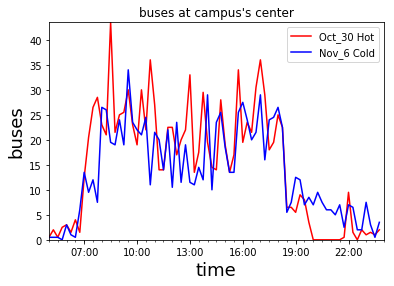

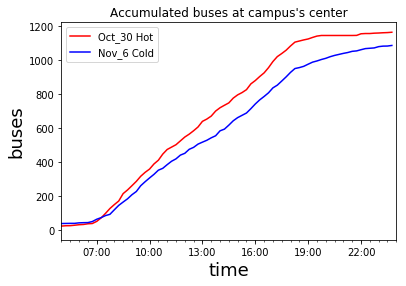

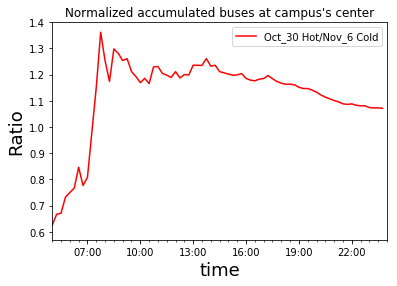

p = 0.5992753238681128


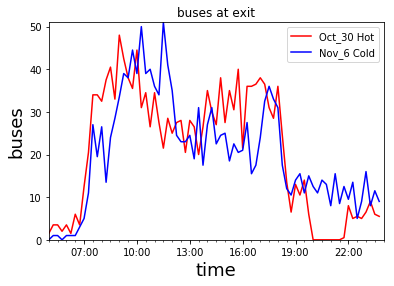

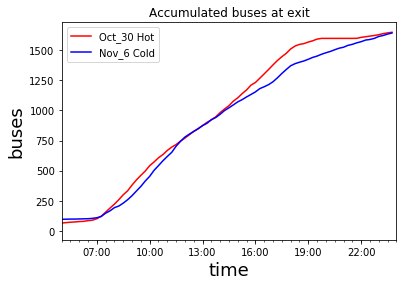

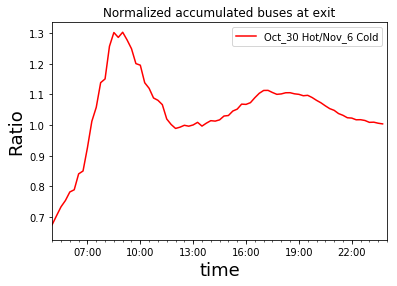

p = 0.9732169669949415


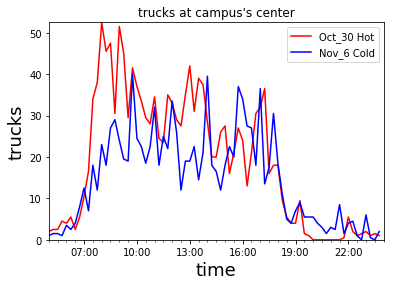

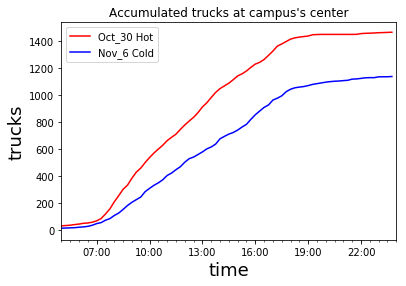

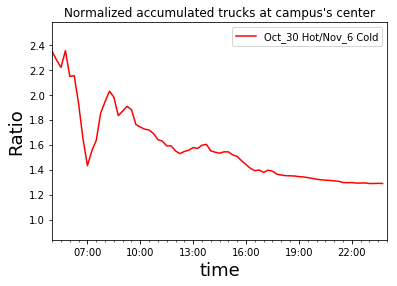

p = 0.0868026790066454


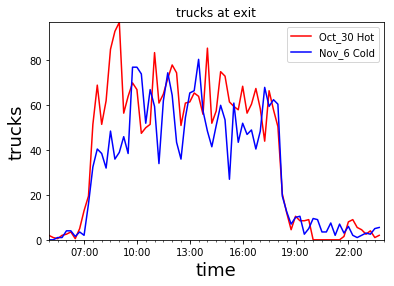

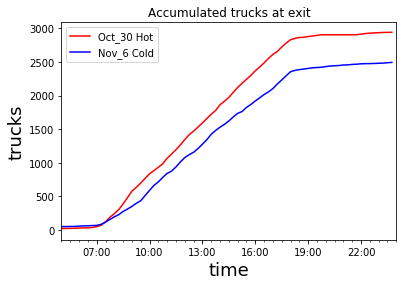

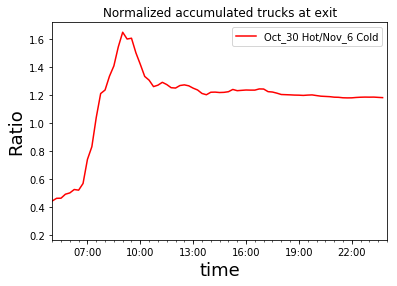

p = 0.2661732179472125


In [80]:
Dots_mod['in_campus']=Dots_mod['location_5'].apply(lambda x:x=='Stadium Drive & Regents Drive')
Dots_mod3=Dots_mod.drop(columns=['location_5'])
Dots_mod4=Dots_mod3.groupby(['time','in_campus','Date','StartTime'],as_index=False).sum()
data_Nov_6_4=Dots_mod4[Dots_mod4['Date']=='2019-11-06']
data_Oct_30_4=Dots_mod4[Dots_mod4['Date']=='2019-10-30']

#data_Nov_6_4['time']=data_Nov_6_4['time'].apply(lambda x:rounded_every_60(x))
#data_Oct_30_4['time']=data_Oct_30_4['time'].apply(lambda x:rounded_every_60(x))
#data_Oct_30_4=data_Oct_30_4.drop(columns=['StartTime'])
#data_Nov_6_4=data_Nov_6_4.drop(columns=['StartTime'])
#data_Oct_30_4=data_Oct_30_4.groupby(['time','in_campus','Date'],as_index=False).max()
#data_Nov_6_4=data_Nov_6_4.groupby(['time','in_campus','Date'],as_index=False).max()


for types in ['pedestrians','bicyclists','cars','buses','trucks']:
    for in_campus in [True, False]:
        if in_campus==True:
            loc="campus's center"
        else:
            loc='exit'
        
        value1=data_Oct_30_4[data_Oct_30_4['in_campus']==in_campus]
        value2=data_Nov_6_4[data_Nov_6_4['in_campus']==in_campus]
        x=value1.time
        y1=value1[types]
        y1_acc=np.cumsum(y1.values)
        y2=value2[types]
        y2_acc=np.cumsum(y2.values)
        
        
        start_time=x.values[0]+np.timedelta64(5,'h')
        end_time=x.values[-1]+np.timedelta64(15,'m')

        #plt.plot(value1.StartTime, value1[types],'r',value2.StartTime,value2[types],'b')
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1, label='Oct_30 Hot',color='r')
        ax.plot(x, y2, label='Nov_6 Cold',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =18)
        plt.ylabel(types,fontsize =18)
        plt.title(types + ' at '+loc, color = "k")
        plt.margins(0)
        plt.show()
        
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1_acc, label='Oct_30 Hot',color='r')
        ax.plot(x, y2_acc, label='Nov_6 Cold',color='b')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =18)
        plt.ylabel(types,fontsize =18)
        plt.title('Accumulated '+ types + ' at '+loc, color = "k")
        plt.show()
        
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.plot(x, y1_acc/y2_acc, label='Oct_30 Hot/Nov_6 Cold',color='r')
        ax.legend()
        ax.set_xlim(xmin=[start_time,end_time])
        ax.xaxis.set_major_locator(md.MinuteLocator(interval=180))  
        ax.xaxis.set_minor_locator(md.MinuteLocator(interval=30))  
        ax.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        plt.xlabel('time', fontsize =18)
        plt.ylabel('Ratio',fontsize =18)
        plt.title('Normalized accumulated '+ types + ' at '+loc, color = "k")
        plt.show()
        
        #calculate p-value
        #print(x.values[5])
        var_1 = y1.values.var(ddof=1)
        var_2 = y2.values.var(ddof=1)
        s = np.sqrt((var_1 + var_2)/2)
        N=y1.values.size
        t = (y1.values.mean() - y2.values.mean())/(s*np.sqrt(2/N))
        df = 2*N - 2
        p = 1 - stats.t.cdf(t,df=df)
        print("p = " + str(2*p))
        
        


### accumulated data